In [3]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
# import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

     |████████████████████████████████| 98 kB 4.9 MB/s eta 0:00:011
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.8-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    widgetsnbextension-3.5.1   |   py38h578d9bd_4         1.8 MB  conda-forge
    ------------------------------------------------------------
                          

In [4]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Areas_of_Manchester').text 
soup = BeautifulSoup(source, 'lxml')

In [5]:
csv_file = open('manchester.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [6]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [7]:
csv_file.close()

In [8]:
manchester_raw = pd.read_csv('manchester.csv')

In [9]:
manchester_raw.shape

(64, 1)

In [10]:
manchester_raw

,Neighbourhood
0,Baguley
1,Barlow Moor
2,"Belle Vue, Manchester"
3,Benchill
4,"Beswick, Manchester"
5,Blackley
6,Bradford-with-Beswick
7,"Bradford, Manchester"
8,Brooklands (Manchester ward)
9,Burnage


In [11]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = manchester_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Manchester, UK'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [12]:
man_data = manchester_raw
man_data['Latitude'] = lat
man_data['Longitude'] = lng

In [13]:
man_data.head()

,Neighbourhood,Latitude,Longitude
0,Baguley,53.399432,-2.294060
1,Barlow Moor,53.426562,-2.266241
2,"Belle Vue, Manchester",53.463060,-2.197180
3,Benchill,53.389117,-2.265841
4,"Beswick, Manchester",53.483817,-2.215130


In [14]:
CLIENT_ID = 'JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W' # your Foursquare ID
CLIENT_SECRET = 'QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W
CLIENT_SECRET:QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ


In [15]:
from geopy.geocoders import Nominatim

address = 'Manchester, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manchester are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manchester are 53.4794892, -2.2451148.


In [16]:
man_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(man_data['Latitude'], man_data['Longitude'], man_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(man_map)  
    
man_map

In [17]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
explore_df_list = []

for i, nhood_name in enumerate(man_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = man_data.loc[i, 'Neighbourhood']
        nhood_lat = man_data.loc[i, 'Latitude']
        nhood_lng = man_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

<ipython-input-18-4decbc75657f>:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby = json_normalize(results) # Flatten JSON


In [19]:
explore_man = pd.DataFrame([item for item in explore_df_list])
explore_man.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_man.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Baguley,53.399432,-2.29406,Lidl,Supermarket,53.400455,-2.295649
1,Baguley,53.399432,-2.29406,B&M Store,Furniture / Home Store,53.401589,-2.299105
2,Baguley,53.399432,-2.29406,McDonald's,Fast Food Restaurant,53.400461,-2.289088
3,Baguley,53.399432,-2.29406,Aldi,Supermarket,53.401268,-2.299659
4,Baguley,53.399432,-2.29406,Costa Coffee,Coffee Shop,53.400795,-2.295027


In [20]:
man_1hot = pd.get_dummies(explore_man[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
man_1hot['Neighbourhood'] = explore_man['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [man_1hot.columns[-1]] + man_1hot.columns[:-1].values.tolist()
man_1hot = man_1hot[fixed_columns]

man_1hot.head()

,Neighbourhood,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Store,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Bowling Green,Brazilian Restaurant,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Canal,Caribbean Restaurant,Casino,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Concert Hall,Convenience Store,Cultural Center,Cupcake Shop,Deli / Bodega,Dessert Shop,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Escape Room,Event Space,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,Forest,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Korean Restaurant,Lake,Lawyer,Lebanese Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Newsagent,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Physical Therapist,Pie Shop,Pizza Place,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Record Shop,Recreation Center,Rental Car Location,Restaurant,Sandwich Place,Science Museum,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Track Stadium,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Yoga Studio
0,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
man_grouped = man_1hot.groupby('Neighbourhood').mean().reset_index()
man_grouped.head()

,Neighbourhood,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Store,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Bowling Green,Brazilian Restaurant,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Canal,Caribbean Restaurant,Casino,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Concert Hall,Convenience Store,Cultural Center,Cupcake Shop,Deli / Bodega,Dessert Shop,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Escape Room,Event Space,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,Forest,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Korean Restaurant,Lake,Lawyer,Lebanese Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Newsagent,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Physical Therapist,Pie Shop,Pizza Place,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Record Shop,Recreation Center,Rental Car Location,Restaurant,Sandwich Place,Science Museum,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Track Stadium,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Yoga Studio
0,Baguley,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429,0.000000,0.071429,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.071429,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000000,0.0,0.0,0.0,0.000000,0.0,0.071429,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.0,0.071429,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.071429,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.214286,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.214286,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Barlow Moor,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.083333,0.000000,0.0,0.0,0.0,0.083333,0.0,0.000000,0.0,0.0,0.0,0.0,0.083333,0.0,0.166667,0.083333,0.000000,0.0,0.0,0.0,0.000000,0.083333,0.0,0.0,0.083333,0.000000,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.083333,0.083333,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,"Belle Vue, Manchester",0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0

In [22]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [23]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = man_grouped['Neighbourhood']

for ind in np.arange(man_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(man_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Supermarket,Tram Station,Fast Food Restaurant,Donut Shop,Pet Store,Hardware Store,Coffee Shop,Furniture / Home Store,Clothing Store,Gym / Fitness Center
1,Barlow Moor,Grocery Store,Lake,Hotel,Fast Food Restaurant,Park,Forest,Outdoor Supply Store,Golf Course,Gym,Bus Station
2,"Belle Vue, Manchester",Convenience Store,Supermarket,Grocery Store,Movie Theater,Climbing Gym,Park,Pharmacy,Racetrack,Bus Stop,Fast Food Restaurant
3,Benchill,Tram Station,Supermarket,Bus Stop,Market,Bus Station,Pub,Pool,Persian Restaurant,Nature Preserve,Newsagent
4,"Beswick, Manchester",Coffee Shop,Bar,Italian Restaurant,Beer Bar,Pub,Brewery,Fish & Chips Shop,Pizza Place,Soccer Stadium,Cocktail Bar


In [24]:
man_grouped_clustering = man_grouped.drop('Neighbourhood', 1)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [26]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for man_clusters in range(2, max_range) :
    
    # Run k-means clustering
    man_gc = man_grouped_clustering
    kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit_predict(man_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(man_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(man_clusters)
    scores.append(score)

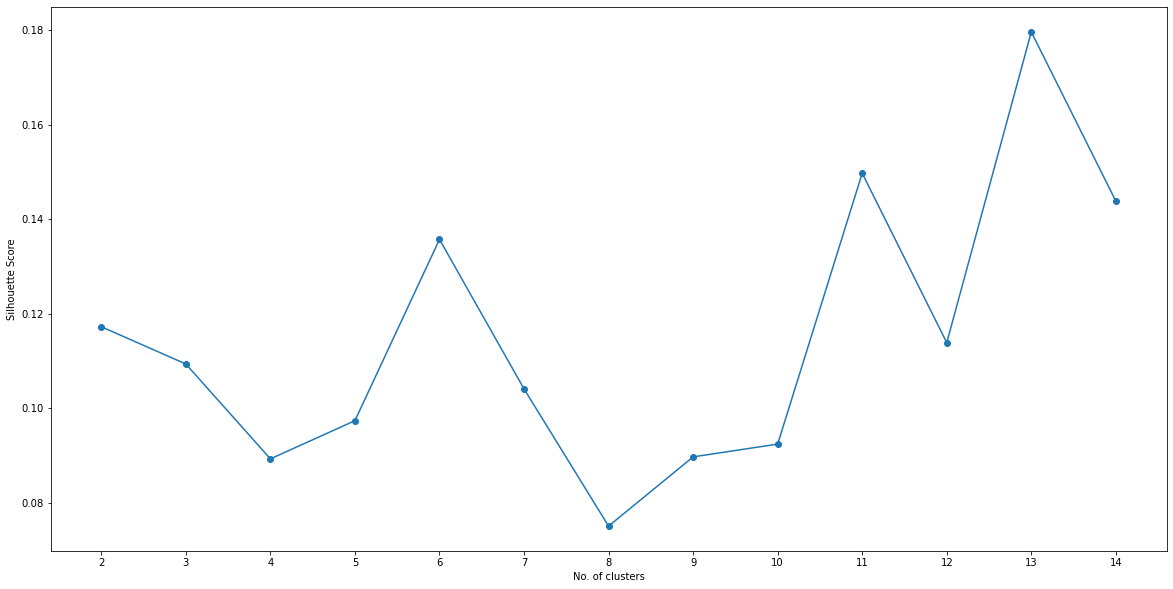

In [27]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [28]:
opt_value = 8

In [29]:
man_clusters = opt_value

# Run k-means clustering
man_gc = man_grouped_clustering
kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit(man_gc)

In [30]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [31]:
man_final = man_data
man_final = man_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
man_final.dropna(inplace = True)
man_final['Cluster Labels'] = man_final['Cluster Labels'].astype(int)
man_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,53.399432,-2.294060,1,Supermarket,Tram Station,Fast Food Restaurant,Donut Shop,Pet Store,Hardware Store,Coffee Shop,Furniture / Home Store,Clothing Store,Gym / Fitness Center
1,Barlow Moor,53.426562,-2.266241,4,Grocery Store,Lake,Hotel,Fast Food Restaurant,Park,Forest,Outdoor Supply Store,Golf Course,Gym,Bus Station
2,"Belle Vue, Manchester",53.463060,-2.197180,4,Convenience Store,Supermarket,Grocery Store,Movie Theater,Climbing Gym,Park,Pharmacy,Racetrack,Bus Stop,Fast Food Restaurant
3,Benchill,53.389117,-2.265841,6,Tram Station,Supermarket,Bus Stop,Market,Bus Station,Pub,Pool,Persian Restaurant,Nature Preserve,Newsagent
4,"Beswick, Manchester",53.483817,-2.215130,0,Coffee Shop,Bar,Italian Restaurant,Beer Bar,Pub,Brewery,Fish & Chips Shop,Pizza Place,Soccer Stadium,Cocktail Bar


In [32]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(man_clusters)
ys = [i + x + (i*x)**2 for i in range(man_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(man_final['Latitude'], man_final['Longitude'], man_final['Neighbourhood'], 
                                  man_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [33]:
val = 1
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Beswick, Manchester",Coffee Shop,Bar,Italian Restaurant,Beer Bar,Pub,Brewery,Fish & Chips Shop,Pizza Place,Soccer Stadium,Cocktail Bar
6,Bradford-with-Beswick,Tram Station,Athletics & Sports,Lounge,Track Stadium,Event Space,Sandwich Place,Sporting Goods Shop,Soccer Stadium,Canal,Café
7,"Bradford, Manchester",Tram Station,Athletics & Sports,Lounge,Track Stadium,Event Space,Sandwich Place,Sporting Goods Shop,Soccer Stadium,Canal,Café
8,Brooklands (Manchester ward),Hotel,Asian Restaurant,Italian Restaurant,Plaza,Bar,Sandwich Place,English Restaurant,Pizza Place,Concert Hall,Sports Bar
11,Castlefield,Pub,Bar,Hotel,Restaurant,Cocktail Bar,Italian Restaurant,Multiplex,Escape Room,Science Museum,Pizza Place
18,Circle Square Manchester,Pub,Bar,Coffee Shop,Café,Brewery,Fast Food Restaurant,College Arts Building,Gay Bar,Park,Museum
22,Didsbury,Italian Restaurant,Pub,Bar,Park,Café,Hotel,Indian Restaurant,Grocery Store,Bakery,Fish & Chips Shop
24,"Glenbrook, Greater Manchester",Hotel,Asian Restaurant,Italian Restaurant,Plaza,Bar,Sandwich Place,English Restaurant,Pizza Place,Concert Hall,Sports Bar
27,Green Quarter,Pub,Italian Restaurant,Bar,Restaurant,Deli / Bodega,Indian Restaurant,Café,Bakery,Boutique,Cocktail Bar
28,"Greenheys, Manchester",Music Venue,Café,Bar,Chinese Restaurant,Pub,Discount Store,Performing Arts Venue,Park,Coffee Shop,Grocery Store


In [34]:
val = 2
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Supermarket,Tram Station,Fast Food Restaurant,Donut Shop,Pet Store,Hardware Store,Coffee Shop,Furniture / Home Store,Clothing Store,Gym / Fitness Center
19,"Clayton, Manchester",Supermarket,Tram Station,Discount Store,Pub,Bus Stop,Coffee Shop,Pet Store,Grocery Store,Gym,Gym / Fitness Center
29,Harpurhey,Supermarket,Hotel,Tram Station,Park,Building,Flea Market,Gym / Fitness Center,Shopping Mall,Pizza Place,Pie Shop
39,"Moston, Manchester",Supermarket,Hotel,Building,Park,Flea Market,Shopping Mall,Gym / Fitness Center,Pizza Place,Pie Shop,Plaza
41,New Moston,Supermarket,Pub,Hotel,Convenience Store,Tram Station,Train Station,Malay Restaurant,Pizza Place,Soccer Stadium,Coffee Shop
43,Newton Heath,Supermarket,Shoe Store,Park,Fast Food Restaurant,Tram Station,Gymnastics Gym,Bus Stop,Athletics & Sports,Lawyer,Portuguese Restaurant
49,Openshaw,Supermarket,Discount Store,Bus Stop,Farmers Market,Go Kart Track,Pet Store,Grocery Store,Gym,Gym / Fitness Center,Clothing Store


In [35]:
val = 3
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,"Cheetham, Manchester",Coffee Shop,Clothing Store,Grocery Store,Brewery,Fast Food Restaurant,Portuguese Restaurant,Furniture / Home Store,Sporting Goods Shop,Park,Soccer Field
20,Collyhurst,Clothing Store,Coffee Shop,Tram Station,Portuguese Restaurant,Fast Food Restaurant,Park,Soccer Field,Shopping Plaza,Pharmacy,Concert Hall
21,Crumpsall,Coffee Shop,Bakery,Grocery Store,Fast Food Restaurant,Halal Restaurant,Café,Park,Sandwich Place,Asian Restaurant,Pop-Up Shop
42,Newall Green,Coffee Shop,Furniture / Home Store,Pub,Sandwich Place,Newsagent,Convenience Store,Tram Station,Bus Stop,Pharmacy,Park
46,Northern Quarter (Manchester),Coffee Shop,Record Shop,Tea Room,Pizza Place,Beer Bar,Bookstore,Restaurant,Falafel Restaurant,Donut Shop,Flea Market
51,"Peel Hall, Wythenshawe",Tram Station,Bakery,Fast Food Restaurant,Supermarket,Coffee Shop,Tanning Salon,Hotel,Fish & Chips Shop,Market,Deli / Bodega
54,"Smedley, Manchester",Coffee Shop,Fast Food Restaurant,Tram Station,Clothing Store,Electronics Store,Men's Store,Grocery Store,Shopping Plaza,Pharmacy,Soccer Field
57,"Strangeways, Manchester",Coffee Shop,Grocery Store,Brewery,Clothing Store,Pizza Place,Hotel,Music Venue,Gym / Fitness Center,Pharmacy,Persian Restaurant
59,West Gorton,Sandwich Place,Newsagent,Discount Store,Climbing Gym,Chinese Restaurant,Sports Club,Café,Electronics Store,Bus Station,Bus Stop
62,Woodhouse Park,Coffee Shop,Discount Store,Hotel,Rental Car Location,Tram Station,Park,Café,Business Service,Soccer Field,Bus Station


In [36]:
val = 4
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Chorlton (ward),Pizza Place,Park,Pub,Coffee Shop,Deli / Bodega,Bar,Restaurant,Spanish Restaurant,Cocktail Bar,Falafel Restaurant
14,Chorlton Park (ward),Indian Restaurant,Grocery Store,Park,Pizza Place,Fabric Shop,Spanish Restaurant,Soccer Field,Coffee Shop,Convenience Store,Pub
15,Chorlton-cum-Hardy,Pizza Place,Park,Bar,Restaurant,Coffee Shop,Pub,Spanish Restaurant,Cocktail Bar,Deli / Bodega,Falafel Restaurant
16,Chorlton-on-Medlock,Pizza Place,Park,Pub,Coffee Shop,Deli / Bodega,Bar,Restaurant,Spanish Restaurant,Cocktail Bar,Falafel Restaurant
17,Chorltonville,Pizza Place,Park,Pub,Coffee Shop,Deli / Bodega,Bar,Restaurant,Spanish Restaurant,Cocktail Bar,Falafel Restaurant
23,Fallowfield,Pub,Bar,Asian Restaurant,Fast Food Restaurant,Chinese Restaurant,Park,Supermarket,Gym / Fitness Center,Thai Restaurant,Portuguese Restaurant
32,Ladybarn,Fast Food Restaurant,Bar,Pub,Asian Restaurant,Chinese Restaurant,Park,Hotel,Grocery Store,Supermarket,Thai Restaurant
33,Levenshulme,Indian Restaurant,Pub,Café,Grocery Store,Gym / Fitness Center,Sandwich Place,Farmers Market,Fast Food Restaurant,Antique Shop,Men's Store
35,Manchester city centre,Pub,Coffee Shop,Record Shop,Arts & Crafts Store,Bar,Tea Room,Brazilian Restaurant,Restaurant,Donut Shop,Pizza Place
38,Moss Side,Café,Music Venue,Supermarket,Pharmacy,Pub,Italian Restaurant,Theater,Pet Store,Fast Food Restaurant,Tanning Salon


In [37]:
val = 5
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barlow Moor,Grocery Store,Lake,Hotel,Fast Food Restaurant,Park,Forest,Outdoor Supply Store,Golf Course,Gym,Bus Station
2,"Belle Vue, Manchester",Convenience Store,Supermarket,Grocery Store,Movie Theater,Climbing Gym,Park,Pharmacy,Racetrack,Bus Stop,Fast Food Restaurant
9,Burnage,Train Station,Supermarket,Grocery Store,Rental Car Location,Park,Chinese Restaurant,Golf Course,Gym / Fitness Center,Toy / Game Store,Coffee Shop
10,Burnage (ward),Train Station,Supermarket,Grocery Store,Rental Car Location,Park,Chinese Restaurant,Golf Course,Gym / Fitness Center,Toy / Game Store,Coffee Shop
25,Gorton,Train Station,Supermarket,Fast Food Restaurant,Park,Racetrack,Go Kart Track,Movie Theater,Gym,Gymnastics Gym,Discount Store
30,Highfield Country Park,Gym,Fast Food Restaurant,Grocery Store,Italian Restaurant,English Restaurant,Shopping Mall,Pizza Place,Pharmacy,Chinese Restaurant,Café
34,Longsight,Park,Supermarket,Grocery Store,Dessert Shop,Pharmacy,Sports Club,Indian Restaurant,Electronics Store,Restaurant,Turkish Restaurant
36,Merseybank,Bus Station,Hotel,Fast Food Restaurant,Forest,Outdoor Supply Store,Golf Course,Grocery Store,Lake,Indian Restaurant,Market
45,Northern Moor,Grocery Store,Electronics Store,Tram Station,Chinese Restaurant,Bowling Green,Soccer Field,Gym / Fitness Center,Monument / Landmark,Fast Food Restaurant,Convenience Store


In [38]:
val = 6
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Great Heaton,Pub,Italian Restaurant,Park,Coffee Shop,Physical Therapist,Outdoor Supply Store,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store


In [39]:
val = 7
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Benchill,Tram Station,Supermarket,Bus Stop,Market,Bus Station,Pub,Pool,Persian Restaurant,Nature Preserve,Newsagent
37,Miles Platting,Tram Station,Men's Store,Canal,Tennis Court,Thai Restaurant,Antique Shop,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue
53,Sharston,Bus Station,Supermarket,Café,Tram Station,Bus Stop,Pet Store,Newsagent,Outdoor Supply Store,Park,Pastry Shop
63,Wythenshawe,Pub,Bar,Tram Station,Bus Stop,Farm,Antique Shop,Pharmacy,Outdoor Supply Store,Park,Pastry Shop


In [40]:
val = 8
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Blackley,Park,Hotel,Coffee Shop,Grocery Store,Antique Shop,Pharmacy,Outdoor Supply Store,Pastry Shop,Performing Arts Venue,Persian Restaurant
